In [1]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
import shutil
import random
import csv


In [2]:
# Define the path to the leaf dataset
corn_dataset_path = '/Users/maggie/Desktop/project_3/Plant_ID_and_Diagnosis/Resources/plant_identifcation_resources/corn_images'

# List the directories within the dataset (train, test, valid)
print("Dataset directories:", os.listdir(corn_dataset_path))


Dataset directories: ['.DS_Store', 'Healthy', 'Gray_Leaf_Spot', 'Blight', 'Common_Rust']


In [4]:
# Image size
img_size = (128, 128)

# Custom function to rename the class folders with combined labels
def rename_class_folders(base_path):
    for plant_folder in os.listdir(base_path):
        plant_path = os.path.join(base_path, plant_folder)
        if os.path.isdir(plant_path):
            for status_folder in os.listdir(plant_path):
                status_path = os.path.join(plant_path, status_folder)
                if os.path.isdir(status_path):
                    # Create the new combined label name
                    combined_label = f"{plant_folder}_{status_folder}".lower().replace(' ', '_')
                    # Rename the folder to reflect the combined label
                    new_status_path = os.path.join(base_path, combined_label)
                    shutil.move(status_path, new_status_path)

# Rename the folders
rename_class_folders(corn_dataset_path)

# Create an ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255)

# Load all data, treating each health status as a sub-class
data_generator = datagen.flow_from_directory(
    corn_dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep shuffle off to ensure consistent labeling
)

# Print class indices to see how classes are interpreted
print("Class indices:", data_generator.class_indices)

# Define the path to the new folder where images will be saved
corn_folder = '/Users/maggie/Desktop/project_3/Plant_ID_and_Diagnosis/Resources/plant_dr_master_dataset/corn_images'
os.makedirs(corn_folder, exist_ok=True)

# Define the path to the CSV file where labels will be stored
csv_file_path = os.path.join(corn_folder, 'image_labels.csv')

# Check existing entries in the CSV file
existing_filenames = set()
if os.path.exists(csv_file_path):
    with open(csv_file_path, mode='r') as csv_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            existing_filenames.add(row['filename'])

# Open the CSV file for writing (append mode)
with open(csv_file_path, mode='a', newline='') as csv_file:
    fieldnames = ['filename', 'label']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    if not existing_filenames:  # Write header only if the file is empty
        writer.writeheader()

    # Iterate over the entire dataset using the data generator
    for batch_index in range(len(data_generator)):
        # Get a batch of images and labels
        images, labels = next(data_generator)

        # Loop through the images and labels to save them with correct filenames
        for i in range(len(images)):
            # Get the image array and convert it to a PIL Image
            image_array = images[i]
            image = Image.fromarray((image_array * 255).astype('uint8'))  # Convert from normalized to pixel values if needed

            # Get the class index and map it to the correct class name
            class_index = labels[i].argmax()  # Find the class index
            class_name = list(data_generator.class_indices.keys())[class_index]

            # Use the combined label (since you've already renamed the folders)
            human_readable_label = class_name

            # Define the file name and save path
            filename = f"{human_readable_label}_{batch_index}_{i+1}.jpg"
            save_path = os.path.join(corn_folder, filename)

            # Check if the file already exists
            if filename not in existing_filenames:
                # Save the image
                image.save(save_path)

                # Write the filename and label to the CSV file
                writer.writerow({'filename': filename, 'label': human_readable_label})

                print(f"Saved image {filename} and wrote to CSV with label {human_readable_label}")
            else:
                print(f"Skipped existing image {filename}")


Found 4188 images belonging to 4 classes.
Class indices: {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
Saved image Blight_0_1.jpg and wrote to CSV with label Blight
Saved image Blight_0_2.jpg and wrote to CSV with label Blight
Saved image Blight_0_3.jpg and wrote to CSV with label Blight
Saved image Blight_0_4.jpg and wrote to CSV with label Blight
Saved image Blight_0_5.jpg and wrote to CSV with label Blight
Saved image Blight_0_6.jpg and wrote to CSV with label Blight
Saved image Blight_0_7.jpg and wrote to CSV with label Blight
Saved image Blight_0_8.jpg and wrote to CSV with label Blight
Saved image Blight_0_9.jpg and wrote to CSV with label Blight
Saved image Blight_0_10.jpg and wrote to CSV with label Blight
Saved image Blight_0_11.jpg and wrote to CSV with label Blight
Saved image Blight_0_12.jpg and wrote to CSV with label Blight
Saved image Blight_0_13.jpg and wrote to CSV with label Blight
Saved image Blight_0_14.jpg and wrote to CSV with label Blight
Sav

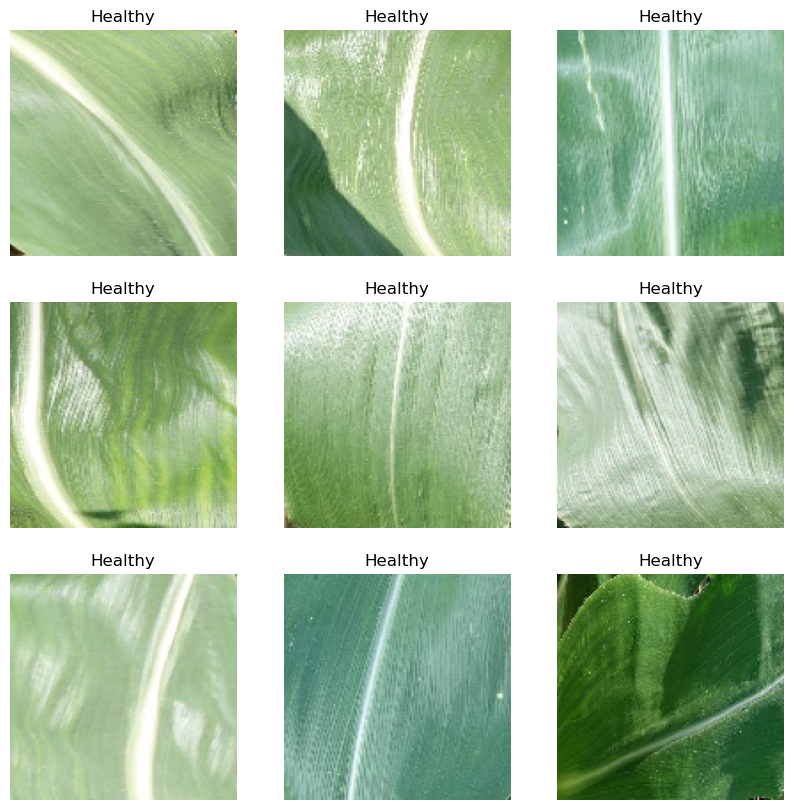

In [5]:
# Plot the first 9 images in the batch (from the last batch for example)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

    # Get the class index and map it to the class name
    class_index = labels[i].argmax()
    class_name = list(data_generator.class_indices.keys())[class_index]
    
    plt.title(class_name)

plt.show()
